In [9]:
import dlib
import cv2
import numpy as np


In [10]:
# Load the pre-trained face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [11]:

# Read the input image
image = cv2.imread('./../WhatsApp Image 2024-10-08 at 3.08.38 PM.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [12]:
import matplotlib.pyplot as plt

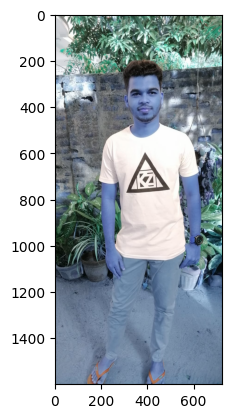

In [13]:
plt.imshow(image)

In [14]:
# Detect faces
faces = detector(gray)

In [15]:






for face in faces:
    landmarks = predictor(gray, face)
    points = np.array([[p.x, p.y] for p in landmarks.parts()])
    
    # Apply a transformation (e.g., affine transformation)
    src_points = np.float32([points[36], points[45], points[30]])  # Eyes and nose tip
    dst_points = np.float32([[0, 0], [1, 0], [0.5, 1]])  # New positions
    matrix = cv2.getAffineTransform(src_points, dst_points)
    transformed = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

    # Display the output
    cv2.imshow('Face Transformation', transformed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
